In [1]:
import psycopg2
import numpy as np
import pandas as pd
import datetime as dt
import cx_Oracle
import csv

#### SQL Reviews

In [2]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
print(con.version)

df = pd.read_sql_query('''
SELECT * FROM 
(
SELECT 
RATINGEVENTOBJECTTARGETID,
s.DT,
s.RATINGEVENTOBJECTSCORE,
REPLACE(s.REVIEWNAME, '?', 'n') AS REVIEWNAME,
REPLACE(s.REVIEWVALUE, '?', 'n') AS REVIEWVALUE
FROM DWHPRO.COMPANY_REVIEW s 
--WHERE to_date(DT) BETWEEN to_date(20180101, 'yyyymmdd') AND to_date(20191231, 'yyyymmdd')
)t 
pivot (
min(REVIEWVALUE) value FOR REVIEWNAME IN ('title', 'description')
)
''', con)
review = df
df_save = df
review.head()

con.close()

11.2.0.3.0


In [3]:
review

,RATINGEVENTOBJECTTARGETID,DT,RATINGEVENTOBJECTSCORE,'title'_VALUE,'description'_VALUE
0,34121772802,2018-09-08,2,:),None
1,33824903220,2018-09-08,5,muy bien y contento,muy bien y contento
2,34120310630,2018-09-08,5,TEAM BUILDING,None
3,34121040078,2018-09-08,5,Formacion profesional de gran valor,None
4,34120994936,2018-09-08,5,Buen trato con los trabajadores.,None
5,34111344204,2018-09-06,2,desorganisada,None
6,34110771200,2018-09-06,3,POSITIVA,None
7,26181301410,2018-09-06,5,Trabajo y buen ambiente en equipo.,None
8,29899939478,2018-09-05,3,Buena,None
9,34102608190,2018-09-05,5,Buena organizacion y amabilidad,None


In [5]:
review.shape

(1370978, 5)

In [6]:
review = review.rename(index=str, 
                       columns=
                       {"RATINGEVENTOBJECTTARGETID": "EXPERIENCE_ID"
                       ,"'title'_VALUE": "TITLE"
                       ,"DT": "DATE_REVIEW" 
                       ,"'description'_VALUE": "DESCRIPTION"
                       ,"RATINGEVENTOBJECTSCORE": "SCORE"}
                      )
review.head()

,EXPERIENCE_ID,DATE_REVIEW,SCORE,TITLE,DESCRIPTION
0,34121772802,2018-09-08,2,:),None
1,33824903220,2018-09-08,5,muy bien y contento,muy bien y contento
2,34120310630,2018-09-08,5,TEAM BUILDING,None
3,34121040078,2018-09-08,5,Formacion profesional de gran valor,None
4,34120994936,2018-09-08,5,Buen trato con los trabajadores.,None


In [ ]:
#review['DESCRIPTION'] = review['DESCRIPTION'].str.decode('utf-8').replace(u'\xf1', 'n')

In [ ]:
#review['REVIEWVALUE'] = review['REVIEWVALUE'].str.decode('utf-8').replace(u'\xf1', 'n')

In [7]:
review.to_csv('reviews_all_data.csv', index= False)
#, sep=';')

#### Concat CSVs Files

In [19]:
import glob

#path = r'...' # use your path
#all_files = glob.glob(path + "/*.csv")
all_files = glob.glob("big_frame/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,sep=';' )
    li.append(df)

big_frame = pd.concat(li, axis=0, ignore_index=True)

In [20]:
#big_frame = big_frame.apply(pd.to_numeric)

In [22]:
big_frame[big_frame['empresa']=='Adevinta']

,Experience_Id,empresa


In [ ]:
big_frame.to_csv('big_frame.csv', index= False)
#, sep=';')

#### Load csv

In [6]:
#Load the data 
df_csv = pd.read_csv('reviews_all_data.csv')#, encoding='latin-1', sep='|', header=None)

In [7]:
df_csv.head()

,EXPERIENCE_ID,DATE_REVIEW,SCORE,TITLE,DESCRIPTION
0,34108291408,2018-09-06,5,Buen trato,Buen trato
1,34112509262,2018-09-06,5,Muy buena,NaN
2,34106163182,2018-09-06,4,"Empresa cercana, con buen ambiente de trabajo ...",NaN
3,34112520088,2018-09-06,5,Excelente Empresa,NaN
4,24253770730,2018-09-06,4,Excelente ambiente de trabajo,Excelentes compa?eros de trabajo


In [8]:
#cambiar df de experiencias
review = df_csv

#### Merge Exp_emp

In [ ]:
big_frame = big_frame.rename(index=str, 
                             columns={"Experience_Id": "EXPERIENCE_ID"
                                     ,"empresa": "EMPRESA"})

In [ ]:
big_frame.head()

In [ ]:
full_dataframe = big_frame.merge(review,how='inner',on = 'EXPERIENCE_ID')

In [ ]:
df = full_dataframe
df.head()

### Experiencias candidatos - Empleo_es

In [ ]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
print(con.version)

df = pd.read_sql_query
sql = '''
SELECT 
CEX_ID,
CEX_FECHA_INSERCION,
CEX_FECHA_MODIFICACION
FROM EMPLEO_ES.CANDIDATOS_EXPERIENCIAS'''

df = pd.read_sql_query(sql,con)

exp_df_empleo = df
df_save = df


con.close()

### Experiencias Company Norm desde BBDD

In [ ]:
#Lista para filtrar en SQL   #= ('Dentix', 'Vivanta') #tuples object para empresas
lista_empresas =(
'KPMG'
,'PwC'
,'EY'
,'Deloitte'
,'Banco Santander'
,'BBVA'
,'Bankinter'
,'ING Direct'
,'ING Nationale-Nederlanden'
,'Repsol'
,'Repsol YPF'
,'Sopra Steria'
,'Sopra Group'
,'Atos Global Delivery Center Canarias'
,'Atos'
,'Capgemini'
,'Sogeti'
)

In [ ]:
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
print(con.version)

df = pd.read_sql_query
sql = '''
SELECT 
ID_EXPERIENCIA
,DESC_EXPERIENCIA_NORMALIZADO
FROM DWHPRO.EXPERIENCIAS_COMPANY_NORM
WHERE 1=1
--AND CREATED_AT >= TO_DATE('2019-01-01','YYYY-mm-dd')
AND NORMALIZATION_MODEL IS NOT NULL
AND SCORE > 0.7
AND DESC_EXPERIENCIA_NORMALIZADO in {}'''.format(lista_empresas)

df = pd.read_sql_query(sql,con)

exp_df = df
df_save = df


con.close()

In [8]:
#TODAS LAS EXP NORMALIZADAS
con =  cx_Oracle.connect('comprasweb_ij/Xxxx1234!@10.10.2.223/MKTG')
print(con.version)

df = pd.read_sql_query
sql = '''
SELECT 
ID_EXPERIENCIA
,ID_EXPERIENCIA_NORM
,DESC_EXPERIENCIA_NORMALIZADO
FROM DWHPRO.EXPERIENCIAS_COMPANY_NORM
WHERE 1=1
--AND CREATED_AT >= TO_DATE('2018-01-01','YYYY-mm-dd')
AND NORMALIZATION_MODEL IS NOT NULL
AND SCORE >= 0.7
--AND ID_EXPERIENCIA_NORM = 2399
'''

df = pd.read_sql_query(sql,con)

exp_df = df
df_save = df

con.close()

11.2.0.3.0


#### To csv

In [9]:
exp_df.to_csv('exp_comp_norm_all_data.csv', index= False)
#, sep=';')

In [10]:
exp_df.shape

(9413137, 3)

#### Read csv

In [9]:
#Load the data 
df_csv = pd.read_csv('exp_comp_norm_all_data.csv')#, encoding='latin-1', sep='|', header=None)

In [ ]:
exp_df = df_csv

In [11]:
exp_df.head()

,ID_EXPERIENCIA,ID_EXPERIENCIA_NORM,DESC_EXPERIENCIA_NORMALIZADO
0,177122173,2399,InfoJobs
1,179714773,2399,InfoJobs
2,181196432,2399,InfoJobs
3,186473170,2399,InfoJobs
4,186559292,4795,Grupo Auna


In [47]:
exp_df.shape

(3954, 2)

In [48]:
grouped_explo = exp_df.groupby(['DESC_EXPERIENCIA_NORMALIZADO'])

# count the unique users, orders, and total revenue per Group + Period
metrics_explo = grouped_explo.agg({'ID_EXPERIENCIA': np.count_nonzero
                      })

# make the column names more meaningful
metrics_explo.rename(columns={'ID_EXPERIENCIA': 'Experiencias'}, inplace=True)
metrics_explo.head(20)

,Experiencias
DESC_EXPERIENCIA_NORMALIZADO,
Anuntis,681
Idealista,816
InfoJobs,755
Schibsted,395
Segundamano,1307


#### df type

In [26]:
exp_df = exp_df.rename(index=str, 
                             columns={"ID_EXPERIENCIA": "EXPERIENCE_ID"
                                     ,"DESC_EXPERIENCIA_NORMALIZADO": "EMPRESA"})

In [27]:
full_dataframe_2 = exp_df.merge(review,how='inner',on = 'EXPERIENCE_ID')

In [28]:
full_dataframe_2[["TITLE", "DESCRIPTION"]] = full_dataframe_2[["TITLE", "DESCRIPTION"]].astype(str) 

In [29]:
from datetime import datetime

In [30]:
full_dataframe_2[["DATE_REVIEW"]] = full_dataframe_2[["DATE_REVIEW"]].astype(datetime)

In [31]:
#quitar ultimos caracteres extraños manualmente
full_dataframe_2["TITLE"] = full_dataframe_2["TITLE"].apply(lambda x: 
x.replace("!", "").replace("?", "n").replace("Enter", "").replace("enter", "")
.replace("#", "")
)

In [32]:
#quitar ultimos caracteres extraños manualmente
full_dataframe_2["DESCRIPTION"] = full_dataframe_2["DESCRIPTION"].apply(lambda x: 
x.replace("!", "").replace("?", "n").replace("Enter", "").replace("enter", "")
.replace("#", "")
)

In [34]:
#From csv
full_dataframe_2['MONTH_ID'] = full_dataframe_2['DATE_REVIEW'].str[:7]

In [33]:
#From SQL
full_dataframe_2['MONTH_ID'] = full_dataframe_2['DATE_REVIEW'].apply(lambda x: x.strftime('%Y-%m'))

AttributeError: 'str' object has no attribute 'strftime'

In [49]:
full_dataframe_2.head()

,EXPERIENCE_ID,EMPRESA,DATE_REVIEW,SCORE,TITLE,DESCRIPTION,MONTH_ID
0,22051233156,Schibsted,2019-07-22,1,"Lectiva: marca defenestrada, en un sector con ...","Lectiva: marca defenestrada, en un sector con ...",2019-07
1,15957279372,Anuntis,2019-09-13,2,Hhh,Hhh,2019-09
2,23756545800,Schibsted,2019-07-22,4,Seguridad vs. apalancamiento: tu decides,Plus - Referente indiscutible en su sector. ...,2019-07
3,16932144226,Anuntis,2019-08-27,4,buena,buena,2019-08
4,21874309044,Anuntis,2019-08-22,5,Muy buena,Muy buena,2019-08


### Plot V1

In [ ]:
# plot de la distribucion de empresas en R y F
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))


ax = full_dataframe_2['SCORE'].value_counts().sort_index()
ax = axes[0]
bars = ax.bar(x, y, color='grey')

ax.set_frame_on(True)
ax.tick_params(left=False, labelleft=False, bottom=False)
ax.set_title('Distribution of SCORE',
            fontsize=14)

for bar in ax.patches:
    value = bar.get_height()
    if value == y.max():
        bar.set_color('firebrick')
    ax.text(bar.get_x() + bar.get_width() / 2,
            value + 2,
            '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
           ha='center',
           va='center',
           color='black')


### Plot V2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


ax = full_dataframe_2['SCORE'].value_counts().plot(kind='bar', figsize=(10,7),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Score", fontsize=18)
ax.set_ylabel("Empresas", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='blue')

### Plot v3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Make a separate list for each empresa
x1 = list(full_dataframe_2[full_dataframe_2['EMPRESA'] == 'Vivanta']['SCORE'])
x2 = list(full_dataframe_2[full_dataframe_2['EMPRESA'] == 'Dentix']['SCORE'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9']#, '#F0E442', '#009E73', '#D55E00']
names = ['Vivanta', 'Dentix']

         
# Make the histogram using a list of lists
plt.hist([x1, x2], bins = int(5), normed=False,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('SCORE')
plt.ylabel('QTY')
plt.title('Distribucion Empresas')

### Plot v4

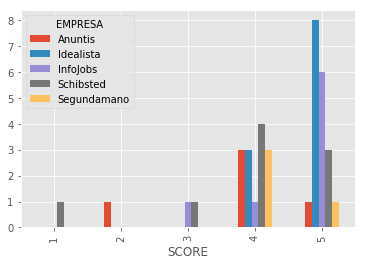

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
df=full_dataframe_2

#groupedvalues=df.groupby(['SCORE']).count().reset_index()
#g=sns.barplot(x='SCORE',y='EMPRESA',data=groupedvalues)

#v2:
groupedvalues=df.groupby(['SCORE','EMPRESA']).count()['EXPERIENCE_ID']#.unstack().plot(kind='bar', stacked=True)
groupedvalues.unstack(level=[1]).plot(kind='bar')

# Plot formatting


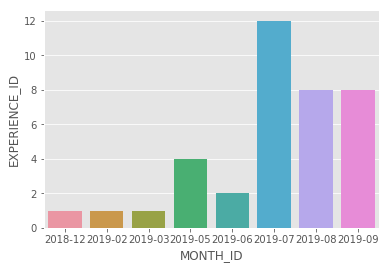

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
df=full_dataframe_2

groupedvalues=df.groupby(['MONTH_ID']).count().reset_index()
g=sns.barplot(x='MONTH_ID',y='EXPERIENCE_ID',data=groupedvalues)

#v2:
#groupedvalues=df.groupby(['MONTH_ID']).count()['EXPERIENCE_ID']#.unstack().plot(kind='bar', stacked=True)
#groupedvalues.unstack(level=[1]).plot(kind='bar')

# Plot formatting


### Export new csv

In [50]:
full_dataframe_2.to_csv('reviews_all_adevinta.csv', index= False)
#, sep=';')

### Agrupar data por empresa

In [37]:

grouped = full_dataframe_2.groupby(['EMPRESA', 'SCORE'])

# count the unique users, orders, and total revenue per Group + Period
metrics = grouped.agg({'EXPERIENCE_ID': pd.Series.nunique,
                      # 'RATINGEVENTOBJECTSCORE': pd.Series.mean,
                      # 'EXPERIENCE_ID': np.median
                      })

# make the column names more meaningful
#metrics.rename(columns={'EM_ID': 'TotalUsers',
 #                       'PRODUCT': 'TotalOrders'}, inplace=True)
metrics.head()

EXPERIENCE_ID
EMPRESA   SCORE               
Anuntis   2                  1
          4                  3
          5                  1
Idealista 4                  3
          5                  8

In [38]:
metrics['EXPERIENCE_ID'].unstack(0)

EMPRESA,Anuntis,Idealista,InfoJobs,Schibsted,Segundamano
SCORE,,,,,
1,NaN,NaN,NaN,1.0,NaN
2,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,1.0,NaN
4,3.0,3.0,1.0,4.0,3.0
5,1.0,8.0,6.0,3.0,1.0


In [39]:

grouped2 = full_dataframe_2.groupby(['EMPRESA'])

# count the unique users, orders, and total revenue per Group + Period
metrics2 = grouped2.agg({'SCORE': [pd.Series.mean, pd.Series.median, pd.Series.std],
                       'EXPERIENCE_ID': np.count_nonzero
                      })

# make the column names more meaningful
metrics2.rename(columns={'SCORE': 'Rating',
                        'EXPERIENCE_ID': 'Reviews'}, inplace=True)
metrics2.head(20)

Rating                        Reviews
                 mean median       std count_nonzero
EMPRESA                                             
Anuntis      3.800000      4  1.095445             5
Idealista    4.727273      5  0.467099            11
InfoJobs     4.625000      5  0.744024             8
Schibsted    3.888889      4  1.269296             9
Segundamano  4.250000      4  0.500000             4

In [40]:
metrics2 = metrics2.round(1)

In [41]:
metrics2

Rating                   Reviews
              mean median  std count_nonzero
EMPRESA                                     
Anuntis        3.8      4  1.1             5
Idealista      4.7      5  0.5            11
InfoJobs       4.6      5  0.7             8
Schibsted      3.9      4  1.3             9
Segundamano    4.2      4  0.5             4

### Concatenar todos los perfiles en csv

In [ ]:
import glob

#path = r'...' # use your path
#all_files = glob.glob(path + "/*.csv")
all_files2 = glob.glob("full_profiles/*.csv")

li2 = []

for filename2 in all_files2:
    df = pd.read_csv(filename2, index_col=None, header=None, encoding='latin-1', sep = ';')
    li2.append(df)

big_frame2 = pd.concat(li2, axis=0, ignore_index=True)

In [ ]:
big_frame2.rename(columns={0: 'Type'
                        ,1: 'Profile_id'
                        ,2: 'Profile_name'
                        ,3: 'id_company_norm'
                        ,4: 'Company_name'
                        ,5: 'Tenant'
                        ,6: 'Date'
                        ,7: 'Fecha_carga'
                        ,8: 'Prob'
                        ,9: 'Norm_model'}, inplace=True)

In [ ]:
big_frame2.head()

In [ ]:
df_profiles = big_frame2[['Profile_id','Profile_name','id_company_norm','Company_name']]

In [ ]:
df_profiles.head()

### Exporte Final Files

In [ ]:
df_profiles.to_csv('df_profiles.csv', index= True)
#, sep=';')

In [ ]:
metrics2.to_csv('company_metrics_v3.csv', index= True)
#, sep=';')

In [ ]:
full_dataframe_2.to_csv('company_reviews_v3.csv', index= True)
#, sep=';')
